In [6]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import requests
from sklearn import preprocessing
import seaborn as sns

url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe
df1.head()

# Shuffle the DataFrame rows
df1 = df1.reindex(np.random.permutation(df1.index))

# Display the shape of the data
print(df1.head())

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
49786            0.0     0.0       0.0        1.0  21.0     0.0     0.0   
236418           2.0     1.0       0.0        1.0  33.0     0.0     0.0   
110853           0.0     1.0       1.0        1.0  29.0     0.0     0.0   
9094             0.0     0.0       1.0        1.0  23.0     0.0     0.0   
3565             0.0     1.0       0.0        1.0  32.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
49786                    0.0           1.0     1.0  ...            1.0   
236418                   1.0           1.0     0.0  ...            1.0   
110853                   0.0           1.0     1.0  ...            1.0   
9094                     0.0           1.0     1.0  ...            1.0   
3565                     1.0           0.0     0.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
49786           0.0      3.0   

In [7]:
# Splitting the dataset into training and testing sets
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)
print (X.shape)
print (y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df1.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print(X_train_scaled[:2])

(253680, 21)
(253680,)
(253680, 22)
(202944, 21)
(50736, 21)
(202944,)
(50736,)
[[ 1.15496776 -0.85634086  0.19644856  0.39637478 -0.89210613 -0.20484653
  -0.32196942  0.56697132  0.76057273  0.48271372 -0.24399374  0.22690346
  -0.30273498  0.45709295 -0.42938179 -0.48637081 -0.44887059 -0.88847788
   0.31673676 -0.05130084  0.45639086]
 [ 1.15496776  1.1677593   0.19644856 -0.51182734 -0.89210613 -0.20484653
  -0.32196942  0.56697132  0.76057273  0.48271372 -0.24399374  0.22690346
  -0.30273498 -0.47921057 -0.294479   -0.48637081 -0.44887059 -0.88847788
   0.31673676  0.96323802  0.93989396]]


Accuracy: 0.77
Confusion matrix:
[[36621   885  5165]
 [  690    33   226]
 [ 4541   291  2284]]


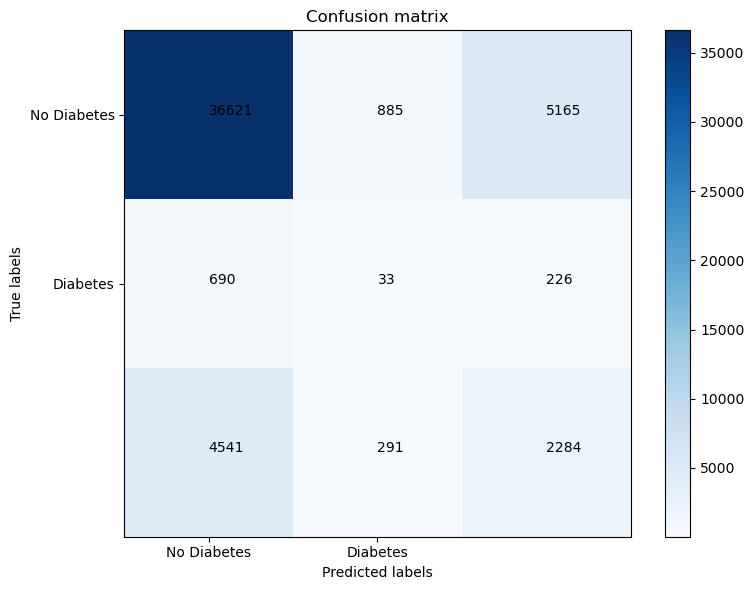

In [13]:
# Train a DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predict the testing set
y_pred = classifier.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(cm)

# Plot the confusion matrix 
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.tight_layout()

# Add values into the confusion matrix 
confusion_m = cm.max() / 2
for i in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(y, i, format(cm[i, y], 'd'))

plt.show()

In [14]:
#determine unique classes
u_t = np.unique(y_test)
u_p = np.unique(y_pred)
print("Unique value in testing:", u_t)
print("Unique value in prediction:", u_p)

Unique value in testing: [0. 1. 2.]
Unique value in prediction: [0. 1. 2.]


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision, recalland F1 score for each class
pr = precision_score( y_pred, y_test, average=None)
rc = recall_score( y_pred, y_test, average=None)
f1 = f1_score( y_pred, y_test, average=None)

# Print precision, recall and F1 score for each class
for class_label, p, r, f in zip(u_t, pr, rc, f1):
    print(f'Class {class_label}:')
    print(f'Precision: {p:.2f}')
    print(f'Recall: {r:.2f}')
    print(f'F1-score: {f:.2f}')
    print()

# Print a classification report 
c_report = classification_report(y_pred, y_test)
print('report', c_report)

Class 0.0:
Precision: 0.86
Recall: 0.88
F1-score: 0.87

Class 1.0:
Precision: 0.03
Recall: 0.03
F1-score: 0.03

Class 2.0:
Precision: 0.32
Recall: 0.30
F1-score: 0.31

report               precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     41852
         1.0       0.03      0.03      0.03      1209
         2.0       0.32      0.30      0.31      7675

    accuracy                           0.77     50736
   macro avg       0.40      0.40      0.40     50736
weighted avg       0.76      0.77      0.76     50736



In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Classifier Accuracy: %.2f' % accuracy_rf)

Random Forest Classifier Accuracy: 0.84


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset from the URL
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"
df1 = pd.read_csv(url)

# Splitting the dataset into training and testing sets
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
s = StandardScaler()
X_test_s = s.transform(X_test)
X_train_s = s.fit_transform(X_train)


# Display the first few rows of the scaled training data
print(X_train_s[:2])

#defining hyperparameters
parameters = {'C': [0.1, 1, 10],
              'kernel': ['linear',  'poly','rbf'],
              'gamma': [0.001, 0.01, 0.1, 'scale', 'auto']}

#create a gridsearch object and connect to the training data 
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_s, y_train)

best_svm = grid_search.best_estimator_

from sklearn.feature_selection import RFE

#select the best 10 
rfe = RFE(estimator=best_svm, n_features_to_select=10)
rfe.fit(X_train_s, y_train)

X_train_rfe = rfe.transform(X_train_s)
X_test_rfe = rfe.transform(X_test_s)
#make predictions using the selcted features
best_svm.fit(X_train_rfe, y_train)
y_pred_rfe = best_svm.predict(X_test_rfe)

accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
print('Accuracy with RFE-selected features:', accuracy_rfe)

Accuracy: 0.99
Confusion matrix:
[[171002      0     30]
 [   211   3468      3]
 [  1114     23  27093]]


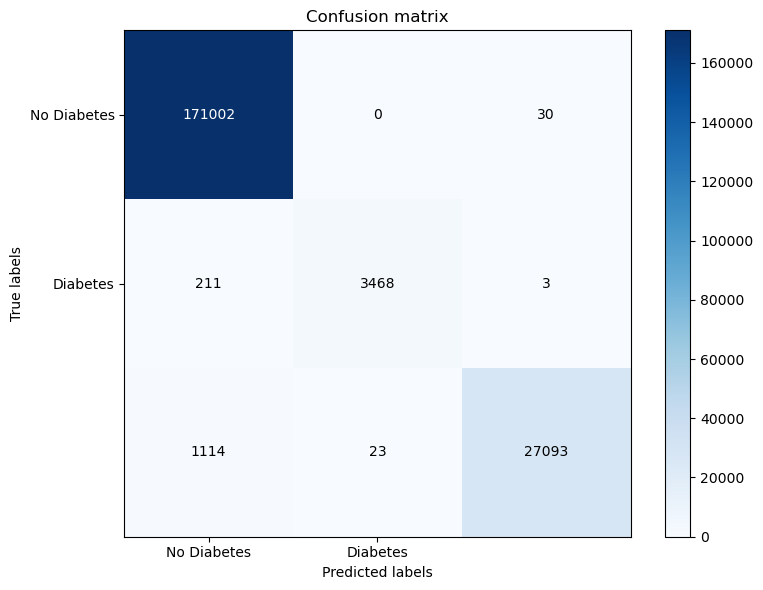

In [12]:


# Initialize the StandardScaler
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_test_s = s.transform(X_test)

# Predict the training set
y_pred = classifier.predict(X_train_s)

# Calculate the accuracy
accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: %.2f' % accuracy)

# Generate a confusion matrix
cm = confusion_matrix(y_train, y_pred)
print('Confusion matrix:')
print(cm)

# Plot the confusion matrix 
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.yticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.tight_layout()

# Add values into the confusion matrix 
confusion_m = cm.max() / 2
for i in range(cm.shape[0]):
    for y in range(cm.shape[1]):
        plt.text(y, i, format(cm[i, y], 'd'))

plt.show()